# Problem 1 - Simple Linear Regression

(1) Model
$$
y_i = \beta_0 + \beta_1 x_i + \epsilon_i
$$
where $x$ = reads (M), $y=\log_2$(TP53).

(2) Compute slope and intercept
$$
\hat{\beta}_1 = \frac{cov(x, y)}{var(x)} = \frac{\sum (x_i - \bar{x}) (y_i - \bar{y})}{\sum (x_i - \bar{x})^2}, \hspace{0.5cm} \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}
$$

In [83]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [73]:
# import data
in_file_name = '../data/data_SLR.csv'
data_in_df =pd.read_csv(in_file_name)
print(data_in_df)

   Sample  Reads (M): x  Log2 (TP53): y
0       1            10             4.1
1       2            12             4.4
2       3            15             4.8
3       4            18             5.0
4       5            20             5.3
5       6            25             5.6
6       7            30             6.1
7       8            35             6.3
8       9            40             6.6
9      10            45             6.8


In [72]:
x = data_in_df['Reads (M): x']
y = data_in_df['Log2 (TP53): y']

In [ ]:
# compute the slope and intercept (using sample covariance and sample variance
cov_xy = x.cov(y)
var_x = x.var()
beta_1 = cov_xy / var_x
beta_0 = y.mean()- beta_1 * x.mean()
print('Using sample covariance and sample variance')
print(round(beta_0, 3), round(beta_1, 3))

# compute the slope and intercept (using population covariance and population variance)
cov_xy = ((x - x.mean()) * (y - y.mean())).mean()
var_x = ((x - x.mean()) * (x - x.mean())).mean()
beta_1 = cov_xy / var_x
beta_0 = y.mean()- beta_1 * x.mean()
print('\nUsing population covariance and population variance')
print(round(beta_0, 3), round(beta_1, 3))

In [81]:
# use sklearn linear regression
linear_regression_obj = LinearRegression()
results = linear_regression_obj.fit(x.to_frame(), y.to_frame())
print(f'beta_1 = {results.coef_}')
print(f'beta_0 = {results.intercept_}')

beta_1 = [[0.07610015]]
beta_0 = [3.59749621]


In [84]:
# use statsmodels
x_sm = sm.add_constant(x)
sm_model = sm.OLS(y, x_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:         Log2 (TP53): y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     268.8
Date:                Thu, 12 Feb 2026   Prob (F-statistic):           1.93e-07
Time:                        21:33:38   Log-Likelihood:                 4.7342
No. Observations:                  10   AIC:                            -5.468
Df Residuals:                       8   BIC:                            -4.863
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.5975      0.128     28.174   

Final fitted line:
$$
\hat{y} = 3.59 + 0.076 *
$$

/opt/anaconda3/envs/teach_ml/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


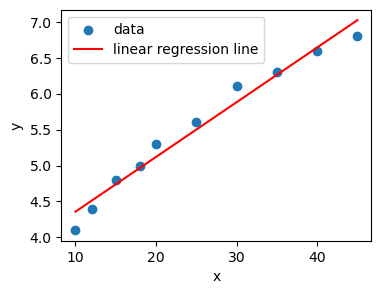

In [75]:
# plot the data and the fitted line
x_line = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_line = linear_regression_obj.predict(x_line)
fig, ax = plt.subplots(figsize=(4, 3))
ax.scatter(x, y, label='data')
ax.plot(x_line, y_line, color='red', label='linear regression line')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()


(3) Interpretation of the slope

Each additional 1M reads is associated with an increase of about 0.076 in log2(TP53) expression (on average).

In [78]:
# predict at 22M reads
hat_y = beta_0 + beta_1 * 22
print(hat_y)

5.271699544764794


(4) Predict at 22M reads
$$
\hat{y} = 3.59 + 0.076 * 22 = 5.271
$$

In [80]:
# residuals for sample 1
hat_y = beta_0 + beta_1 * 10
e = 4.1 - hat_y
print(e)
print()

# residuals for sample 10
hat_y = beta_0 + beta_1 * 45
e = 4.1 - hat_y
print(e)

-0.2584977238239752

0.19049317147192735


(5) Residuals for sample 1 and 10

Signs of residuals: positive residual means model under-predicted and negative residual means model over-predicted.